##ASSIGNMENT 4
#PART - A

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import os

In [2]:
from PIL import Image
image_path = 'C:\Abdul Sameer\ICG_CycleGANS\Assgn4\imgs'  # Replace with the path to your image file
all_files=os.listdir(image_path)
all_files=[f for f in all_files if f.lower().endswith('.webp')]
images = []
ts=(256,256)
for file in all_files:
    imgp=os.path.join(image_path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    image=np.array(image)/255.0
    images.append(image)

images = np.array(images)
# Display the image using matplotlib


#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply prewitt filter
#b) apply sobel filter
#then output the resulting image

Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)


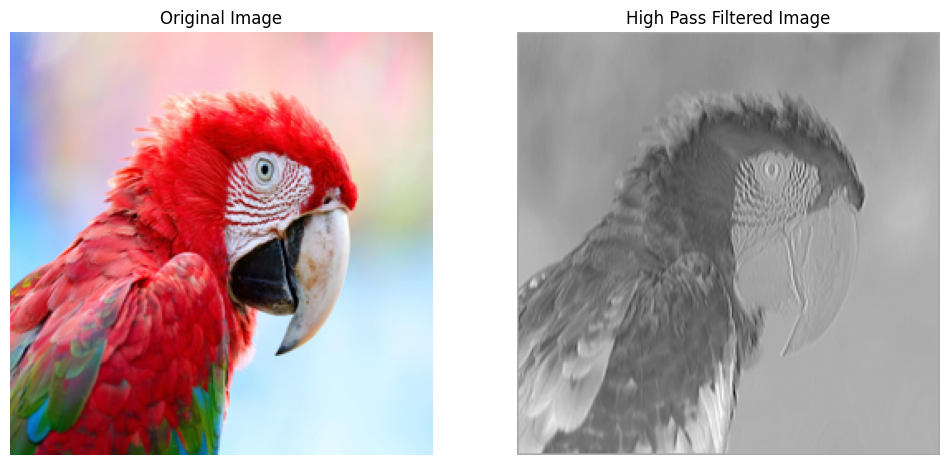

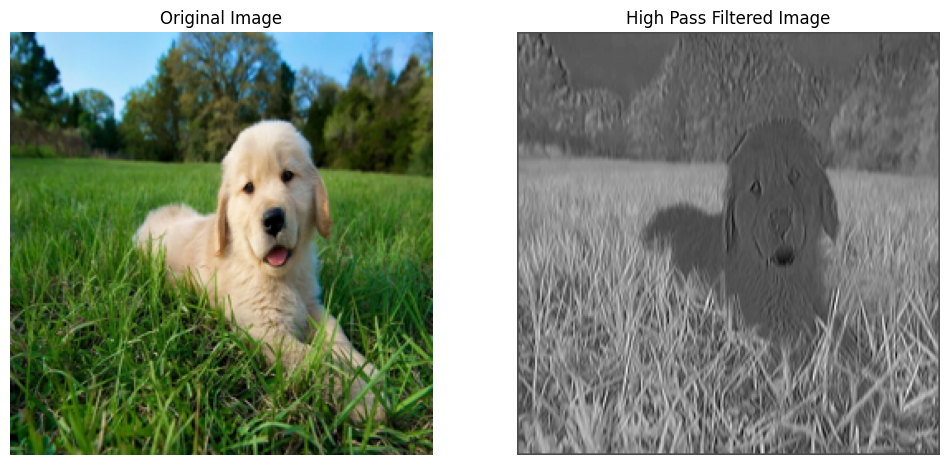

In [3]:
def apply_highpass(arr):
    filter_arr=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

    new_arr=np.zeros((256,256))
    

    for i in range(1,255):
        for j in range(1,255):
            new_arr[i,j]=np.sum(filter_arr*arr[i-1:i+2,j-1:j+2])

    ans=new_arr/(np.max(new_arr))
    return ans

for image in images:
    # Display the original image and the Sobel filtered image
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('High Pass Filtered Image')
    plt.imshow(apply_highpass(image), cmap='gray')
    plt.axis('off')

    plt.show()

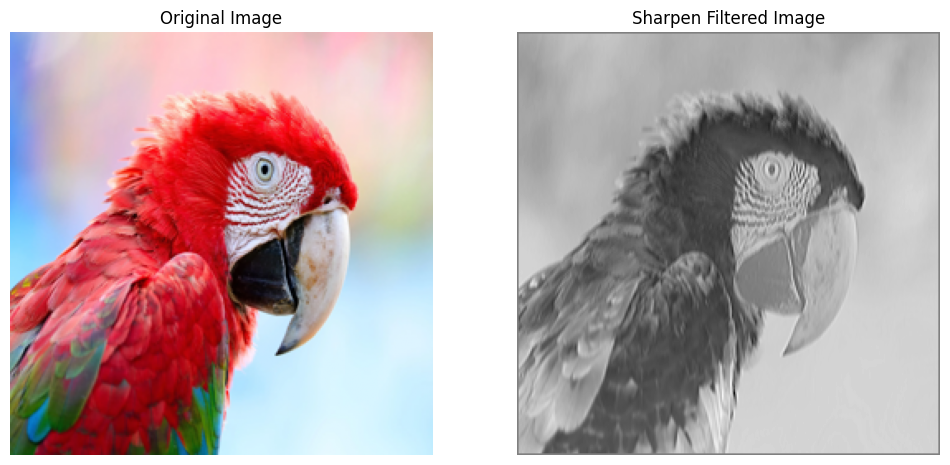

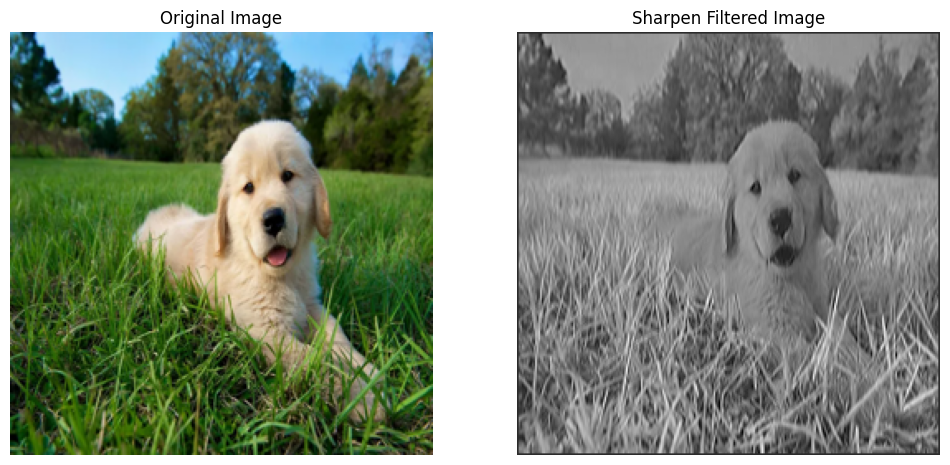

In [4]:
def apply_highpass(arr):
    filter_arr=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

    new_arr=np.zeros((256,256))
    

    for i in range(1,255):
        for j in range(1,255):
            new_arr[i,j]=np.sum(filter_arr*arr[i-1:i+2,j-1:j+2])

    ans=new_arr/(np.max(new_arr))
    return ans

for image in images:
    # Display the original image and the Sobel filtered image
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Sharpen Filtered Image')
    plt.imshow(apply_highpass(image), cmap='gray')
    plt.axis('off')

    plt.show()


### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [68]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [72]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
K=K.reshape(1,K.shape[0])
Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [73]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [ ]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.

In [71]:
def corr2d(X: np.array, K: np.array) -> np.array:
   h,w=K.shape
   Y=np.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
   for i in range(Y.shape[0]):
      for j in range(Y.shape[1]):
         Y[i,j] = np.sum(X[i:i+h,j:j+w]*K)
   return Y

In [89]:
#use the above corr2d in model
class model:
    def __init__(self,lr,epochs):
      #Write your code here
      self.lr=lr
      self.epochs=epochs

    def fit(self,X,Y):
      X_2d = X[0, 0, :, :]
      Y_2d = Y[0, 0, :, :]
      K = np.random.rand(1, 2) 
      for i in range(self.epochs):
        print(f'Epoch [{i+1}/{self.epochs}], Kernel is {K}','\n')
        output=corr2d(X_2d,K)
        grad=np.zeros_like(K)
        for i in range(Y_2d.shape[0]):
          for j in range(Y_2d.shape[1]):
            grad+=(2*(output[i,j]-Y_2d[i,j]))*(X_2d[i:i+1,j:j+2])
        K=K-(lr*grad)
      return K

In [90]:
gd = model(3e-2,100)
gd.fit(X,Y)

Epoch [1/100], Kernel is [[0.04475073 0.99298692]] 

Epoch [2/100], Kernel is [[-0.35853062 -0.47165945]] 

Epoch [3/100], Kernel is [[ 0.72827726 -0.06412521]] 

Epoch [4/100], Kernel is [[ 0.34790799 -0.8792296 ]] 

Epoch [5/100], Kernel is [[ 0.9652127  -0.54015536]] 

Epoch [6/100], Kernel is [[ 0.67169484 -1.01174073]] 

Epoch [7/100], Kernel is [[ 1.03471774 -0.76268102]] 

Epoch [8/100], Kernel is [[ 0.82635291 -1.0439823 ]] 

Epoch [9/100], Kernel is [[ 1.04555902 -0.87145551]] 

Epoch [10/100], Kernel is [[ 0.90380324 -1.04308606]] 

Epoch [11/100], Kernel is [[ 1.0387177  -0.92729146]] 

Epoch [12/100], Kernel is [[ 0.94455243 -1.03369343]] 

Epoch [13/100], Kernel is [[ 1.02869507 -0.95738228]] 

Epoch [14/100], Kernel is [[ 0.96701963 -1.02406987]] 

Epoch [15/100], Kernel is [[ 1.01996874 -0.97432854]] 

Epoch [16/100], Kernel is [[ 0.97991905 -1.01643121]] 

Epoch [17/100], Kernel is [[ 1.01343695 -0.98422722]] 

Epoch [18/100], Kernel is [[ 0.98756864 -1.01093642]] 

Epo

array([[ 1., -1.]])

In [91]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE
    m, n_H, n_W, n_C=X.shape
    X_pad=np.zeros((m, n_H + 2 * pad, n_W + 2 * pad, n_C))
    X_pad[:,pad:n_H+pad,pad:n_W+pad,:]=X
    # YOUR CODE ENDS HERE

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


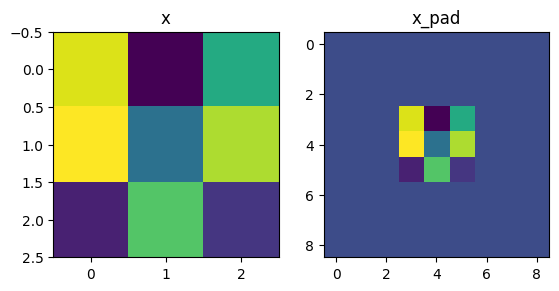

In [92]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [97]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    s=np.multiply(a_slice_prev,W)
    Z = np.sum(s)
    Z = Z+ float(b)
    # YOUR CODE ENDS HERE

    return Z

In [98]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


C:\Users\shaik\AppData\Local\Temp\ipykernel_17156\1528364930.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z+ float(b)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [102]:
a_slice_prev.shape

(4, 4, 3)

In [116]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """
    m, n_H_prev, n_W_prev, n_C_prev=A_prev.shape
    f, f, n_C_prev, n_C=W.shape
    
    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H=int((n_H_prev-f+2*pad)/stride) + 1
    n_W=int((n_W_prev-f+2*pad)/stride) + 1
    Z=np.zeros((m, n_H, n_W, n_C))
    A_prev_pad=zero_pad(A_prev,pad)
    
    for b in range(m):
        a_prev_pad=A_prev_pad[b]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    start1=h*stride
                    end1=start1 + f
                    start2=w*stride
                    end2=start2 + f

                    a_slice_prev=a_prev_pad[start1:end1,start2:end2,:]
                    
                    Z[b,h,w,c]=conv_single_step(a_slice_prev,W[:,:,:,c],b)
    
    
    # YOUR CODE ENDS HERE
    cache = (A_prev, W, b, hparameters)

    return Z,cache

In [117]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)



Z's mean =
 0.8326523394410662
Z[0,2,1] =
 [-0.77914755  7.98994547 -0.11732757  2.71851371  4.10946616 -4.74499377
 10.8506373   2.51821384]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [125]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """

    # Retrieve dimensions from the input shape
    m, n_H_prev, n_W_prev, n_C_prev=A_prev.shape

    # Retrieve hyperparameters from "hparameters"
    f=hparameters['f']
    stride=hparameters['stride']

    # Define the dimensions of the output
    n_H=int((n_H_prev-f)/stride)+1
    n_W=int((n_W_prev-f)/stride)+1

    # Initialize output matrix A
    A=np.zeros((m, n_H, n_W, n_C_prev))

    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C_prev):
                    start1=h*stride
                    start2=w*stride
                    s=A_prev[i,start1:start1+f,start2:start2+f,c]
                    if mode == 'max':
                        A[i,h,w,c]=np.max(s)
                    elif mode == 'average' :
                        A[i,h,w,c]=np.mean(s)

    # YOUR CODE ENDS HERE

    return A

In [126]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [127]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A= pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```